# **University, Happiness and Healthy Life Expectancy**

## **Table of Content** ##

1. Introduction
2. Data File
3. Data import & Data wrangling
4. Analysis and answer to the questions
5. Findings and Conclusions
6. Recommendations
7. References

### **1. Introduction** ###

Universities play an important role in building of new institutions of civil society, development of new cultural values and engineering transformation in one society’s economic, political, social and cultural aspects. Many past studies have evaluated how a university degree affects the lifespan of people in any given country. This project focuses on the correlation between the number of universities on the level of happiness and life expectancy of the people in a country.

The first part of this project discusses the number of universities each year from 2017 to 2022 in the world according to QS World University Rankings. “Ranked university” refers to a university which is listed in the annual publication of global university rankings by Quacquarelli Symonds. This first part explores further the distribution of ranked university in the world according to the country and region, the ratio of the number of ranked university to a population of one million and 1000 square kilometres in each country. It also highlights the top 10 countries that has the largest number of ranked university.

The second part of this project explores if there is a relationship between level of happiness and life expectancy. It will further discuss the relationship between the number of university and the level of happiness and life expectancy.

Questions to be answered:
1. How many ranked university worldwide are there each year from 2017 to 2022? What is the distribution of the ranked university according to its type in 2022?
2. What is the distribution of the ranked university worldwide in terms of country and region? Which 10 countries have the most ranked universities?
3. What is the ratio of the number of ranked university to a population of one million in each country?
4. What is the ratio of the number of ranked university to 1000 square kilometers in each country?
5. What is the level of happiness and healthy life expectancy of each country based on the data in 2020?
6. Is there a relationship between level of happiness and healthy life expectancy in each country based on the data in 2020?
7. What is the change in healthy life expectancy from 1960 to 2020 worldwide?
8. Is there a relationship between the number of ranked universities and the level of happiness and healthy life expectancy?

### **2. Data File** ###

This notebook uses the below four data files. The key that links the files is the column "Country", "Country Name" or "Country/Territory".

**qs-world-university-rankings-2017-to-2022-V2.csv**

File obtained from [kaggle](https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022). The author consolidates the ranking from QS World University Rankings, between 2017 - 2022. In this analysis, I will include the following columns: 

* university - name of the university
* year - year of ranking
* country - country in which the university is located
* region - continent in which the university is located
* type - type of university

**world_population.csv**

File obtained from 
[kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset). The dataset contains Population data of every Country/Territory in the world. The main columns I am using are as follows:
* Country/Territories: Name of the Country/Territories.
* Continent: Name of the Continent.
* 2020 Population: Population of the Country/Territories in the year 2020.
* Area (km²): Area size of the Country/Territories in square kilometer.

**WHR20_DataForFigure2.1.csv**

File obtained from [kaggle](https://www.kaggle.com/datasets/londeen/world-happiness-report-2020). This contains the data used to calculate the Happiness Score for 153 countries. Main columns I am using in the analys are as follows:
* Country name: The name of the Country
* Ladder score: The Happiness Score for the Country
* Healthy life expectancy: Healthy life expectancies at birth are based on the data extracted from the World


**API_SP.DYN.LE00.IN_DS2_en_csv_v2_4700946.csv**

File obtained from 
[World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?most_recent_year_desc=true). Life expectancy at birth, total (years) from 1960 to 2020. The columns we are using in the analysis are as follows:
* Country Name
* 1960 - Life expectnacy at 1960
* 2020 - Life expectnacy at 2020



In [142]:
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
from numpy import where

%matplotlib inline

### **3. Data import & Data wrangling** ###

In [143]:
df_life_expect = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_4700946.csv', skiprows=4, thousands=',')
df_happiness = pd.read_csv('WHR20_DataForFigure2.1.csv', thousands=',')
df_uni = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv', thousands=',')
df_pop = pd.read_csv('world_population.csv', thousands=',')

The country/territory may be not the same in the files, so I have to align them in order to join them together for analysis. I will the country name in the world population set as standard.

In [144]:
country_rename_list = {
    'Syrian Arab Republic':'Syria',
    'Macau SAR':'Macau',
    'Palestinian Territory, Occupied':'Palestine',
    'Iran, Islamic Republic of':'Iran',
    'Hong Kong SAR':'Hong Kong',
    'China (Mainland)':'China'
}
country_rename_list2 = {
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',
    'Palestinian Territories': 'Palestine'
}
country_rename_list3 = {
    'Syrian Arab Republic': 'Syria',
    'Brunei Darussalam': 'Brunei',
    'Macao SAR, China': 'Macau',
    'Venezuela, RB': 'Venezuela',
    'Slovak Republic': 'Slovakia',
    'Iran, Islamic Rep.': 'Iran',
    'Hong Kong SAR, China': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Korea, Rep.': 'South Korea',
    'Turkiye': 'Turkey',
    'Czechia': 'Czech Republic', 
    'Egypt, Arab Rep.': 'Egypt'
}
for name, to_rename in country_rename_list.items():
    df_uni['country'] = df_uni['country'].replace(name, to_rename)

for name, to_rename in country_rename_list2.items():
    df_happiness['Country name'] = df_happiness['Country name'].replace(name, to_rename)

for name, to_rename in country_rename_list3.items():
    df_life_expect['Country Name'] = df_life_expect['Country Name'].replace(name, to_rename)

# Remove those countries without 1960 and 2020 data
df_life_expect = df_life_expect[df_life_expect['1960'].notnull() & df_life_expect['2020'].notnull()]


### **4. Analysis and answer to the questions** ###

**Q1. How many ranked university worldwide each year from 2017 to 2022? What is the distribution of the ranked university according to its type in 2022?**

First of all, let's look at the data about university from QS World Ranking.

<AxesSubplot:title={'center':'Ranked univesity from 2017-2022'}, xlabel='Year', ylabel='No. of ranked university'>

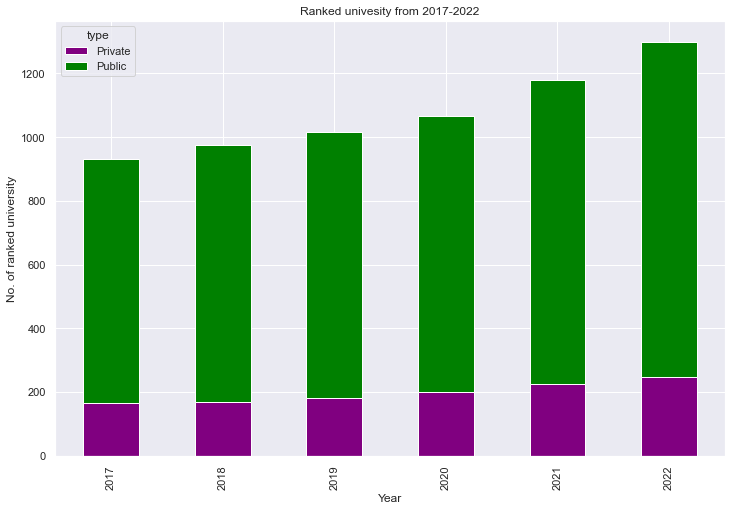

In [145]:
s_uni_year_type = df_uni.groupby(['year', 'type']).size()
df_uni_year_type = s_uni_year_type.unstack()

# Plot the horizontal bar
df_uni_year_type[['Private', 'Public']].plot(
    kind = 'bar',
    stacked = True,
    color = ['purple', 'green'], 
    figsize = [12, 8],
    xlabel  = 'Year',
    ylabel ='No. of ranked university',
    title = 'Ranked univesity from 2017-2022'
)

Based on 2022 data, let's find out the ratio of the university type.

<AxesSubplot:title={'center':'Type of univesity on 2022'}, ylabel='University Type'>

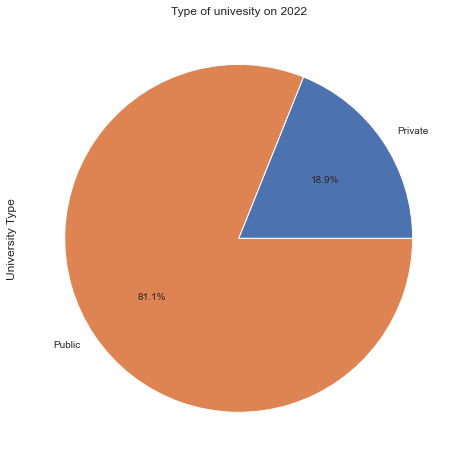

In [146]:
df_uni_2022 = df_uni[df_uni['year'] == 2022]
s_uni_type = df_uni_2022.groupby(['type']).size()
s_uni_type.plot(
    title='Type of univesity on 2022',
    kind='pie', 
    figsize = [12, 8],
    ylabel = 'University Type',
    autopct='%1.1f%%', 
    fontsize=10
)

**Answer to Q1**

The number of ranked university increases from 800 to around 1,300 from 2017 to 2022. In 2022, among them,19% are private while 81% are public.

**Q2. What is the distribution of the ranked university worldwide in terms of country and region? Which 10 countries have the most ranked universities?**

No of country with ranked university: 97


<AxesSubplot:title={'center':'Top 10 countries with most ranked universities'}, xlabel='Country', ylabel='No. of ranked university'>

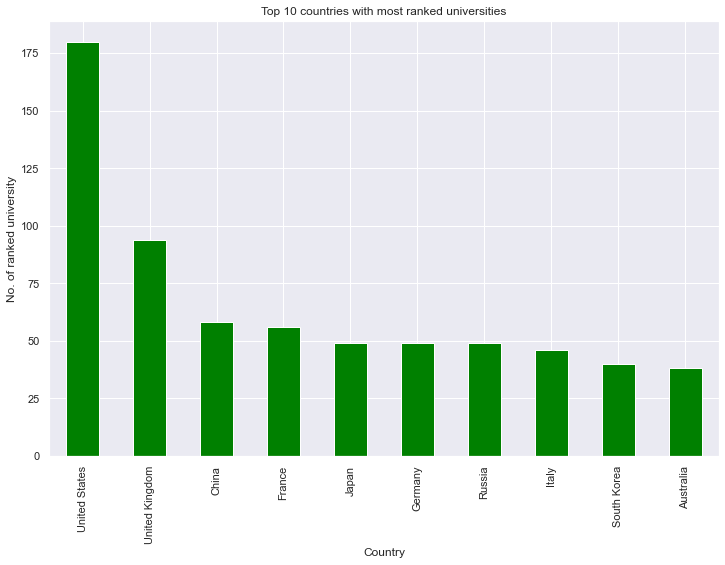

In [147]:
# Obtain the required columns only

df_uni_country = df_uni[['university','country']]
df_uni_country = df_uni_country.drop_duplicates()

s_uni_country = df_uni_country.groupby(['country']).size()
print(f'No of country with ranked university: {s_uni_country.size}')

s_uni_country.sort_values(ascending=False, inplace=True)
s_uni_country_top10 = s_uni_country.iloc[:10]

s_uni_country_top10.plot(
    title = 'Top 10 countries with most ranked universities',
    kind='bar',    
    figsize = [12, 8],
    xlabel = 'Country',
    ylabel = 'No. of ranked university',
    color = 'green'
)

Now, group the data in regions.

<AxesSubplot:title={'center':'Ranked university across region'}, ylabel='None'>

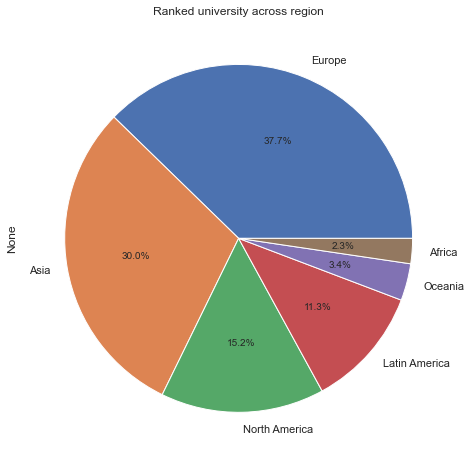

In [148]:
# Distribution of ranked universities across world regions

df_uni_region = df_uni[['university','region']]
df_uni_region = df_uni_region.drop_duplicates()

s_uni_region = df_uni_region.groupby(['region']).size()
s_uni_region.sort_values(ascending=False, inplace=True)

s_uni_region.plot(
    title = 'Ranked university across region',
    kind='pie', 
    figsize = [12, 8],
    autopct='%1.1f%%'
)

**Answer to Q2** 

The result shows that the ranked universities are distributed amongst an aggregate total of 97 countries/territories.

It is found that that the country/territory having the highest number of ranked universities is United States, accounting for 10% worldwide. The next 9 countries are United Kingdom, China, France, Japan, Russia, Italy, South Korea and Australia.

Europe, bearing the highest number of ranked universities amongst the 6 regions and accounting for 37.1% share worldwide, comes as no surprise.  This could be explained by 4 of top 10 countries with highest number ranked universities, namely United Kingdom, France, Russia and Italy are located at Europe.



**Q3. What is the ratio of the number of ranked university to a population of 1 million in each country?**

Let's take the population of the countries into the account for the analysis.

In [149]:
df_uni_country_cnt = pd.DataFrame(s_uni_country)
df_uni_country_cnt['country_name'] = df_uni_country_cnt.index
df_uni_country_cnt = df_uni_country_cnt.rename(columns= {0: 'uni_count'})

df_uni_pop = df_uni_country_cnt.merge(df_pop, how='left', left_on = 'country', right_on = 'Country/Territory')

df_uni_pop['uni_per_million'] = (df_uni_pop['uni_count'] / df_uni_pop['2020 Population']) * 1000000

df_uni_cnt_population = df_uni_pop[['Country/Territory', 'uni_count', '2020 Population', 'uni_per_million']]
df_uni_cnt_per_million = df_uni_cnt_population.sort_values(by='uni_per_million', ascending=False)

df_uni_cnt_per_million.reset_index(inplace=True)
df_uni_cnt_per_million.head(10)

,index,Country/Territory,uni_count,2020 Population,uni_per_million
0,81,Brunei,2,441725,4.527704
1,77,Macau,2,676283,2.957342
2,72,Estonia,3,1329444,2.256582
3,71,Bahrain,3,1477469,2.030499
4,30,Finland,11,5529468,1.989341
5,93,Malta,1,515357,1.940402
6,38,New Zealand,9,5061133,1.778258
7,54,Lithuania,5,2820267,1.772882
8,43,Ireland,8,4946119,1.617430
9,65,Latvia,3,1897052,1.581401


<AxesSubplot:title={'center':'University per population in one million'}, xlabel='Country/Territory'>

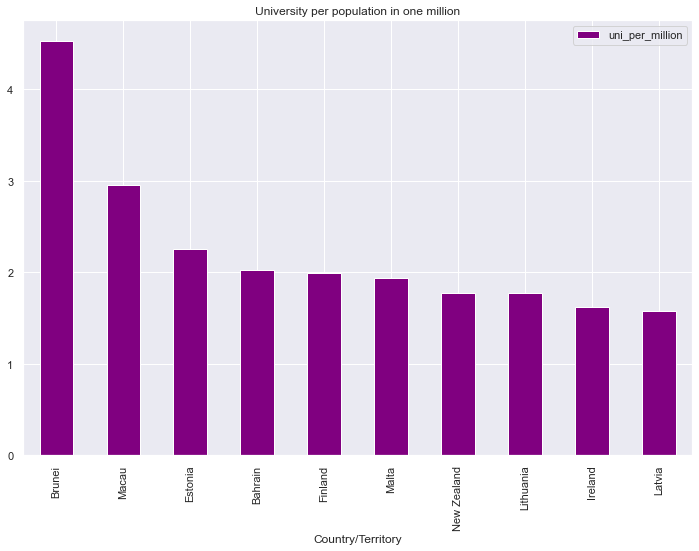

In [150]:
df_uni_cnt_per_million[['Country/Territory','uni_per_million']].head(10).plot(
    title = 'University per population in one million',
    kind = 'bar', 
    figsize = [12, 8],
    x = 'Country/Territory',
    y = 'uni_per_million',
    color='purple'
)

Let's look at the top 10 countries with highest number of ranked universities.

In [151]:
df_top_10 = df_uni_cnt_per_million[df_uni_cnt_per_million['Country/Territory'].isin(s_uni_country_top10.keys())]
df_top_10.head(10)

,index,Country/Territory,uni_count,2020 Population,uni_per_million
11,9,Australia,38,25670051,1.480324
13,1,United Kingdom,94,67059474,1.401741
28,3,France,56,64480053,0.868486
33,7,Italy,46,59500579,0.773102
34,8,South Korea,40,51844690,0.771535
45,5,Germany,49,83328988,0.588031
49,0,United States,180,335942003,0.535807
56,4,Japan,49,125244761,0.391234
61,6,Russia,49,145617329,0.336498
90,2,China,58,1424929781,0.040704


**Answer to Q3**

In the result, it is shown that Brunei has the highest ratio of ranked universities per capita, followed by Macau and Estonia.  None of the top 10 countries/territories having the highest ratio of ranked universities per capita are listed on the top 10 countries/territories with the highest number of ranked universities. 

Russia and China, listed as two of the top 10 countries with highest number of ranked universities, both of more than 100 million populations, are found in the lower half of the 97 countries.

**Q4. What is the ratio of the number of ranked university to 1000 square kilometers in the countries?**

Now, let's take the area of the countries into account for the analysis.

In [152]:
df_uni_pop['uni_per_1000km2'] = (df_uni_pop['uni_count'] / df_uni_pop['Area (km²)']) * 1000
df_uni_cnt_population = df_uni_pop[['Country/Territory', 'uni_count', 'Area (km²)', 'uni_per_1000km2']]

df_uni_cnt_per_area = df_uni_cnt_population.sort_values(by='uni_per_1000km2', ascending=False)
df_uni_cnt_per_area.reset_index(inplace=True)
df_uni_cnt_per_area.head(10)

,index,Country/Territory,uni_count,Area (km²),uni_per_1000km2
0,77,Macau,2,30,66.666667
1,48,Hong Kong,7,1104,6.340580
2,67,Singapore,3,710,4.225352
3,71,Bahrain,3,765,3.921569
4,93,Malta,1,316,3.164557
5,12,Taiwan,28,36193,0.773630
6,44,Lebanon,8,10452,0.765404
7,70,Palestine,3,6220,0.482315
8,8,South Korea,40,100210,0.399162
9,1,United Kingdom,94,242900,0.386991


<AxesSubplot:title={'center':'University per area in 1000 square kilometers'}, xlabel='Country/Territory'>

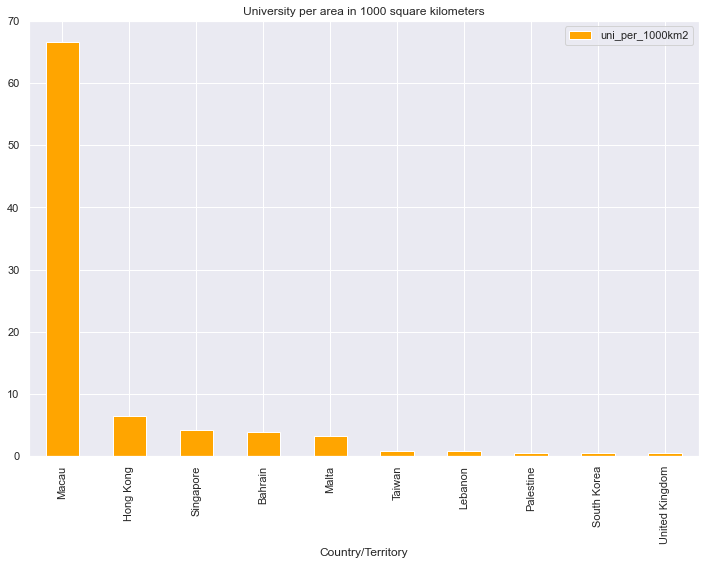

In [153]:
df_uni_cnt_per_area[['Country/Territory','uni_per_1000km2']].head(10).plot(
    title = 'University per area in 1000 square kilometers',
    kind='bar', 
    figsize = [12, 8],
    x = 'Country/Territory',
    y = 'uni_per_1000km2',
    color='orange'
)


Let's look at the top 10 countries with highest number of ranked universities.

In [154]:
df_top_10 = df_uni_cnt_per_area[df_uni_cnt_per_area['Country/Territory'].isin(s_uni_country_top10.keys())]
df_top_10.head(10)

,index,Country/Territory,uni_count,Area (km²),uni_per_1000km2
8,8,South Korea,40,100210,0.399162
9,1,United Kingdom,94,242900,0.386991
17,7,Italy,46,301336,0.152654
19,5,Germany,49,357114,0.137211
21,4,Japan,49,377930,0.129654
27,3,France,56,551695,0.101505
59,0,United States,180,9372610,0.019205
80,2,China,58,9706961,0.005975
84,9,Australia,38,7692024,0.004940
91,6,Russia,49,17098242,0.002866


**Answer to Q4**

In the result, it is shown that Macau has the highest ratio of ranked universities per Earth’s surface, followed by Hong Kong and Singapore. Other than South Korea and United Kingdom, none of the top 10 countries having the highest ratio of ranked universities per Earth’s surface is included in the top 10 countries having the most ranked universities. 

Countries occupying more than 7 million square kilometers of Earth’s surface, such as Australia, China and Russia, are found in the lower half of the 97 countries.

**Q5. What is the level of happiness and healthy life expectancy of each country based on the data in 2020?**

Let's move to level of happiess and healthy life expectany. The dataset is based on the World Happiess Report by World Bank on 2020.

In [155]:
df_happiness = df_happiness[['Country name', 'Regional indicator', 'Ladder score', 'Healthy life expectancy']]

In [156]:
df_happiness['Ladder score'].describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Ladder score, dtype: float64

<AxesSubplot:>

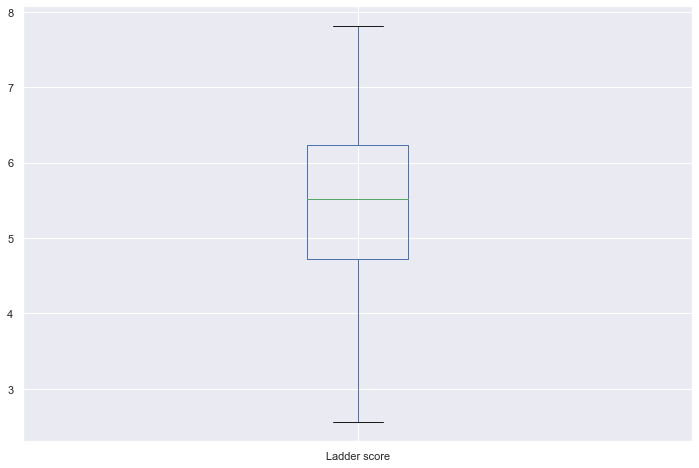

In [157]:
df_happiness['Ladder score'].plot(
    kind = 'box',
    figsize = [12, 8]
)

Now, sort the country by the Ladder Score

In [158]:
df_ladder = df_happiness.sort_values(by='Ladder score', ascending=True)
df_ladder.tail(10)


,Country name,Regional indicator,Ladder score,Healthy life expectancy
9,Luxembourg,Western Europe,7.2375,72.599998
8,Austria,Western Europe,7.2942,73.002502
7,New Zealand,North America and ANZ,7.2996,73.202629
6,Sweden,Western Europe,7.3535,72.600769
5,Netherlands,Western Europe,7.4489,72.300919
4,Norway,Western Europe,7.4880,73.200783
3,Iceland,Western Europe,7.5045,73.000000
2,Switzerland,Western Europe,7.5599,74.102448
1,Denmark,Western Europe,7.6456,72.402504
0,Finland,Western Europe,7.8087,71.900825


<AxesSubplot:title={'center':'Top 10 Happiest countries'}, ylabel='Country name'>

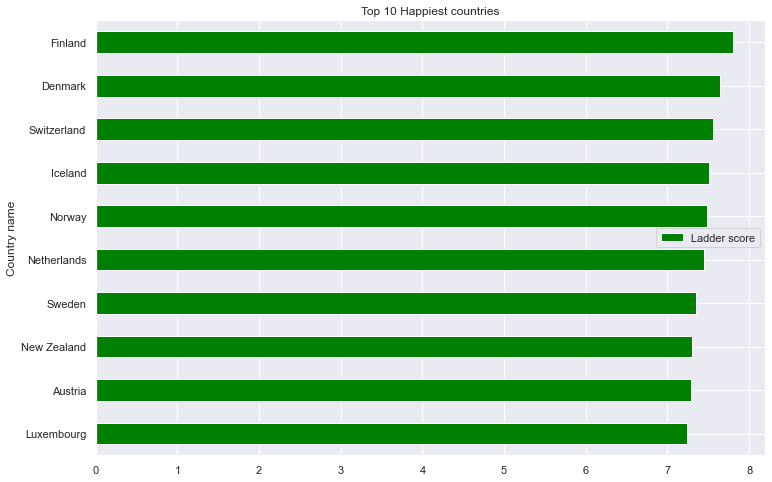

In [159]:
df_ladder.tail(10).plot(
    title = 'Top 10 Happiest countries',
    kind='barh',    
    figsize = [12, 8],
    x = 'Country name',
    y = 'Ladder score',
    color='green'
)

Let's switch to have a look on the life expectancy.

<AxesSubplot:>

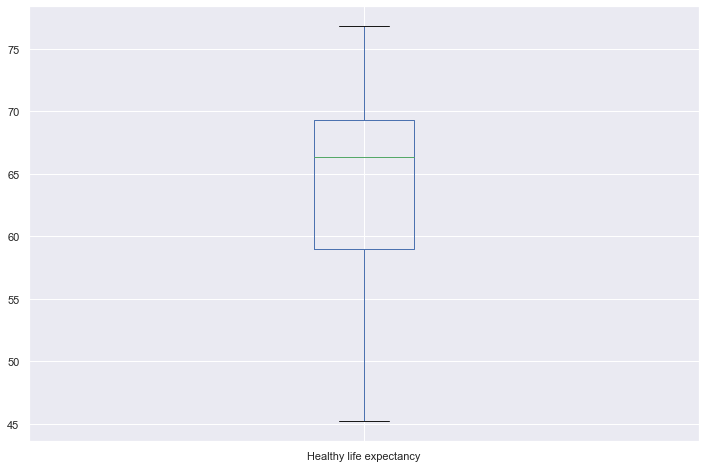

In [160]:
df_happiness['Healthy life expectancy'].plot(
    kind = 'box',
    figsize = [12, 8]
)

In [161]:
df_happiness['Healthy life expectancy'].describe()

count    153.000000
mean      64.445529
std        7.057848
min       45.200001
25%       58.961712
50%       66.305145
75%       69.289192
max       76.804581
Name: Healthy life expectancy, dtype: float64

Now, sort the countries by Health Life Expectancy.

In [162]:
df_health_life_expect_2020 = df_happiness.sort_values(by='Healthy life expectancy', ascending=True)
df_health_life_expect_2020.tail(10)

,Country name,Regional indicator,Ladder score,Healthy life expectancy
60,South Korea,East Asia,5.8724,73.602730
11,Australia,North America and ANZ,7.2228,73.604538
44,Cyprus,Western Europe,6.1590,73.702225
75,North Cyprus,Western Europe,5.5355,73.702225
22,France,Western Europe,6.6638,73.801933
2,Switzerland,Western Europe,7.5599,74.102448
27,Spain,Western Europe,6.4009,74.402710
61,Japan,East Asia,5.8708,75.000969
77,Hong Kong,East Asia,5.5104,76.771706
30,Singapore,Southeast Asia,6.3771,76.804581


<AxesSubplot:title={'center':'Top 10 countries with longest healthy life expectancy in 2020'}, ylabel='Country name'>

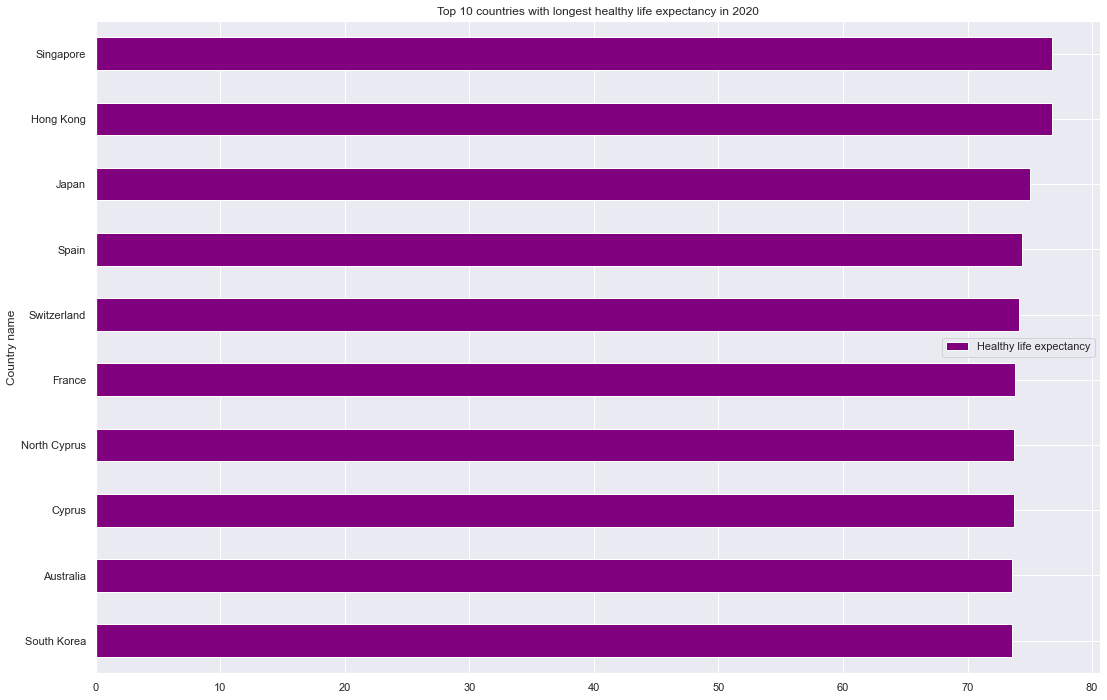

In [163]:
df_health_life_expect_2020 = df_happiness.sort_values(by='Healthy life expectancy', ascending=True)

df_health_life_expect_2020.tail(10).plot(
    title = 'Top 10 countries with longest healthy life expectancy in 2020',
    kind='barh', 
    figsize = [18, 12],
    x = 'Country name',
    y = 'Healthy life expectancy',
    color = 'purple'
)

**Answer to Q5**

The result shows that the average Ladder score is 5.51, while the lower and upper percentiles are 4.72 and 6.22 respectively.

Countries having the highest score in happiness is Finland, followed by Denmark and Switzerland. Except New Zealand, nine of top 10 countries having the highest score in happiness belong to European region. Surprisingly, none of the top 10 countries with most ranked university is on the list.

For healthy life expectancy, the average health life expectancy is 66.31 years old, while the lower and upper percentiles are 58.96 years old and 69.29 years old respectively.

Top countries/territories having the highest score in healthy life expectancy is Singapore, followed by Hong Kong, Japan, South Korea and Australia, all of which are also the top ten countries with most ranked universities.

**Q6. Is there a relationship between level of happiness and healthy life expectancy in each country based on the data in 2020?**

The correlation between Ladder score and Healthy life expectancy is 0.7703162898718497


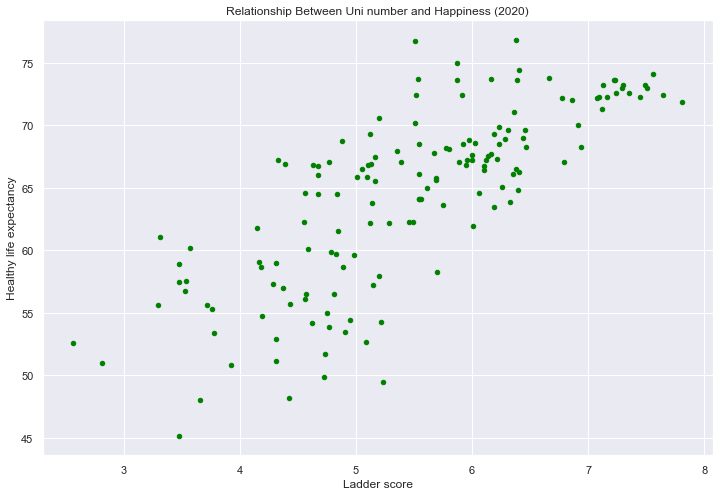

In [164]:
df_health_life_expect_2020.plot(
    kind = 'scatter',
    x = 'Ladder score',
    y = 'Healthy life expectancy',
    figsize=[12, 8],
    color='green',
    title='Relationship Between Uni number and Happiness (2020)'
)

correlation = df_health_life_expect_2020['Ladder score'].corr(df_health_life_expect_2020['Healthy life expectancy'])
print(f'The correlation between Ladder score and Healthy life expectancy is {correlation}')

**Answer to Q6**

Though most of the top 10 on these two variables are not quite the same, a strong correlation between these two variables is found, with the coefficient 0.75.

**Q7. What is the change in healthy life expectancy from 1960 to 2020 worldwide?**

Now, let's look at change of life expectancy from 1960 to 2020, from another dataset containing the change in these 60 years.

In [165]:
df_life_expect[['1960', '2020']].describe()

,1960,2020
count,237.000000,237.000000
mean,53.284177,72.452942
std,11.847831,7.088834
min,28.199000,53.679000
25%,43.250962,67.428000
50%,51.971000,73.628000
75%,63.881000,77.419000
max,73.549756,85.387805


<AxesSubplot:xlabel='variable', ylabel='value'>

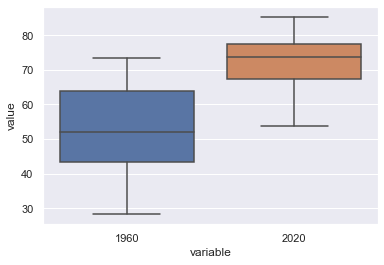

In [166]:
df = pd.DataFrame(data = df_life_expect, columns = ['1960', '2020'])

sns.boxplot(x="variable", y="value",  data=pd.melt(df))

In [167]:
df_life_expect['change_rate'] = (df_life_expect['2020'] - df_life_expect['1960']) /  df_life_expect['1960']
df_life_expect = df_life_expect[['Country Name', 'Country Code', '1960',  '2020', 'change_rate']]

df_life_expect.sort_values(by='change_rate', ascending=False,  inplace=True)
df_life_expect.head(10)

,Country Name,Country Code,1960,2020,change_rate
262,"Yemen, Rep.",YEM,29.919,66.181,1.212006
152,Maldives,MDV,37.343,79.208,1.121094
158,Mali,MLI,28.199,59.692,1.116813
32,Bhutan,BTN,34.526,72.080,1.087702
237,Timor-Leste,TLS,33.729,69.712,1.066827
2,Afghanistan,AFG,32.446,65.173,1.008661
178,Nepal,NPL,35.583,71.067,0.997218
86,"Gambia, The",GMB,32.054,62.383,0.946185
131,Liberia,LBR,34.264,64.423,0.880195
216,South Sudan,SSD,31.697,58.095,0.832823


In [168]:
df_highest_change = df_life_expect.head(10)
df = df_highest_change[df_highest_change['Country Name'].isin(s_uni_country.keys())]
df.head(10)

,Country Name,Country Code,1960,2020,change_rate


Let's have a look the top 10 countries with most ranked university.

In [169]:
df_top_10 = df_life_expect[df_life_expect['Country Name'].isin(s_uni_country_top10.keys())]
df_top_10.head(10)

,Country Name,Country Code,1960,2020,change_rate
40,China,CHN,43.725000,77.097000,0.763225
126,South Korea,KOR,55.415537,83.426829,0.505477
119,Japan,JPN,67.666098,84.615610,0.250488
116,Italy,ITA,69.123902,82.343902,0.191251
77,France,FRA,69.868293,82.175610,0.176150
13,Australia,AUS,70.817073,83.200000,0.174858
55,Germany,DEU,69.310024,80.941463,0.167818
81,United Kingdom,GBR,71.126829,80.902439,0.137439
251,United States,USA,69.770732,77.280488,0.107635
202,Russia,RUS,66.055293,71.338780,0.079986


**Answer to Q7**

The average healthy life expectancy is shown to have increased significantly from 55 years old in 1960 to 73 years old in 2020. 

The top 10 countries experiencing the largest improvement in healthy life expectancy belong to developing countries, mainly located at South Asia and Africa. However, none of the top 10 countries with the largest improvement in healthy life expectancy is listed on countries being ranked at QS World University Rankings.

Of the top 10 countries with most ranked universities, China, South Korea and Japan have comparatively larger improvement in healthy life expectancy than others.

**Q8. Is there a relationship between the number of ranked universities and the level of happiness and healthy life expectancy?**

Lastly, let's see have they any relationship with the university number in the countries. 

The correlation between University count and Ladder score is 0.2209579196750079


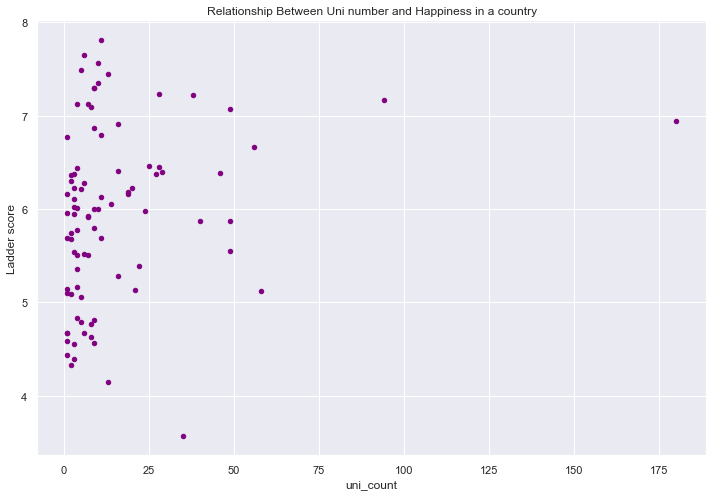

In [170]:
df_uni_pop_happy = df_uni_pop.merge(df_happiness, how='left', left_on = 'country_name', right_on = 'Country name')
df_uni_pop_happy.plot(
    kind = 'scatter',
    x = 'uni_count',
    y = 'Ladder score',
    figsize=[12, 8],
    color='purple',
    title='Relationship Between Uni number and Happiness in a country'
)

correlation = df_uni_pop_happy['uni_count'].corr(df_uni_pop_happy['Ladder score'])
print(f'The correlation between University count and Ladder score is {correlation}')

The correlation between University count and Healthy life expectancy is 0.18201246096706275


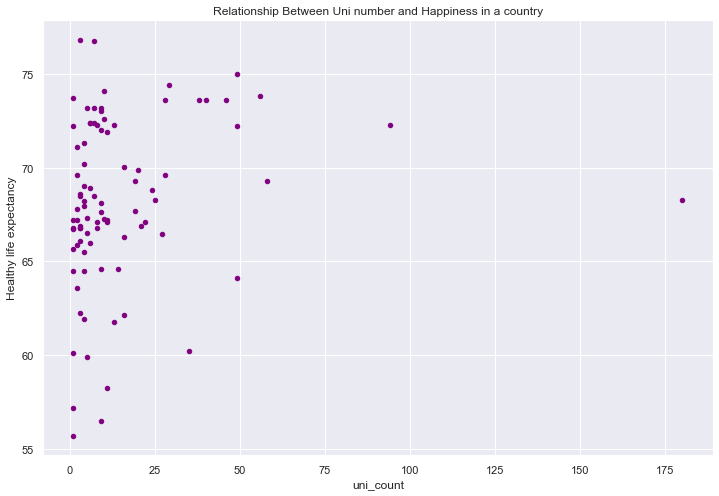

In [171]:
df_uni_pop_happy.plot(
    kind = 'scatter',
    x = 'uni_count',
    y = 'Healthy life expectancy',
    figsize=[12, 8],
    color='purple',
    title='Relationship Between Uni number and Happiness in a country'
)

correlation = df_uni_pop_happy['uni_count'].corr(df_uni_pop_happy['Healthy life expectancy'])
print(f'The correlation between University count and Healthy life expectancy is {correlation}')

Let's take the ratio to the population and area of the countries into account.

Text(0.5, 1.0, 'Correlation of University Count with Level of Happiness and Healthy Life Expectancy')

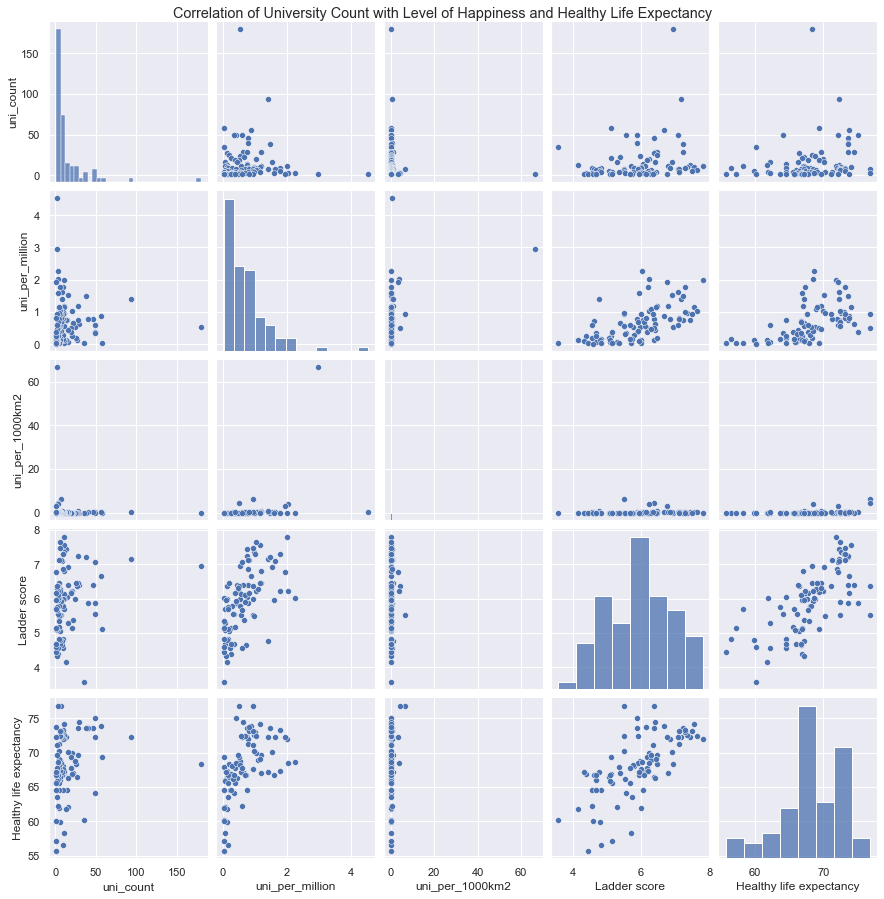

In [177]:
df_uni_pop_area_happy = df_uni_pop_happy[['Country/Territory', 'uni_count', 'uni_per_million', 'uni_per_1000km2', 'Ladder score', 'Healthy life expectancy']]

sns.set()
s = sns.pairplot(
    data = df_uni_pop_area_happy
)
s.fig.suptitle("Correlation of University Count with Level of Happiness and Healthy Life Expectancy", y=1.0)

In [173]:
df_uni_pop_area_happy.corr()

,uni_count,uni_per_million,uni_per_1000km2,Ladder score,Healthy life expectancy
uni_count,1.000000,-0.016092,-0.062422,0.220958,0.182012
uni_per_million,-0.016092,1.000000,0.354954,0.596247,0.526728
uni_per_1000km2,-0.062422,0.354954,1.000000,0.061953,0.312415
Ladder score,0.220958,0.596247,0.061953,1.000000,0.682864
Healthy life expectancy,0.182012,0.526728,0.312415,0.682864,1.000000


**Answer to Q8**

The result shows that there is a weak correlation between the number of universities and the level of happiness and healthy life expectancy, with the correlation coefficient around 0.2 for both variables.

If the ratio takes into account the country’s Earth surface, the correlation coefficient is even less, meaning there is weaker correlation.

However, when the ratio takes into account the number of ranked universities of each country/territory per capita, the correlation coefficient for the level of happiness and healthy life expectancy is around 0.59 and 0.52 respectively.  This shows a moderate correlation between the number of universities and the level of happiness and healthy life expectancy.

### **5. Findings and Conclusions** ### 

In the analysis, I found out that most ranked universities are located at United States, which accounts for 10% of all ranked universities worldwide. In terms of region, most ranked universities are located at Europe then Asia. There are more public ranked universities than private ones.

There is no direct relationship between the number of ranked universities of any one country and its population.  In addition, Earth’s surface occupied by a country/territory is not indicative measure of the number of ranked universities in a given country/territory. 

Worth noting is both UK and South Korea have high ranked universities to Earth’s surface ratios, while being the top 10 countries with most ranked universities.

On relationship between the number of ranked universities and the level of happiness and healthy life expectancy, none of the top 10 countries with most ranked universities is on the top 10 list of level of happiness and healthy life expectancy. 

In contrast, when only the level of happiness and healthy life expectancy are concerned, there is as expected a strong correlation between the two.

The world’s average healthy life expectancy is shown to have increased significantly from 55 years old in 1960 to 73 years old in 2020. The top 10 countries experiencing the largest improvement in healthy life expectancy belong to developing countries, including Asia and Africa. However, none of the top 10 countries with the largest improvement in healthy life expectancy is listed on countries being ranked at QS World University Rankings.


### **6. Recommendations** ###

As the analysis is just based on the number of university in a country. I believe there will be more findings if more variables for a university, such as age, gender ratio, ethnic group etc are put into account for future analysis.

### **7. References** ###

Banerjee, S. (2022) *World Population Dataset* [Online] kaggle.com. Available at https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

Londeen, M. (2020) *World Happiness Report 2020* [Online] kaggle.com. Available at https://www.kaggle.com/datasets/londeen/world-happiness-report-2020

MUNIRAJ, P. (2022) *QS World University Rankings 2017 - 2022* [Online] kaggle.com. Available at https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022

The Data World Bank (2021) *Life expectancy at birth, total (years)* [Online] Available at https://data.worldbank.org/indicator/SP.DYN.LE00.IN?most_recent_year_desc=true

The Economist (2021) Educated Americans live longer, as others die younger [Online] Available at https://www.economist.com/graphic-detail/2021/03/17/educated-americans-live-longer-as-others-die-younger

